# Spectral Leakage

*Leakage* is a phenomena that occurs when the input sequence $x[n]$ contains frequencies other than the analytical frequencies associated with each *bin* of the DFT output. A *bin* simply refers to a single frequency-domain sample in the DFT output. The analytical frequencies of the DFT are:

$$f_{analysis} = \frac{m \, F_s}{N} \text{,  where } m = \text{0, 1, 2, ..., N-1}$$

When $x[n]$ contains frequencies other than the analytical frequencies, the energy from those frequencies *leak* into all of the other bins in the DFT output. This makes the DFT only an approximation of frequency content for real-world finite-length time sequences.

To better understand how leakage affects the amplitude response of the DFT output, we will analyze what happens when the DFT's input sequence is an arbitrary, real sinusoid. When the input sequence is an *N-point* cosine wave containing $k$ cycles (where k can be any real value, not just integers), the amplitude response of an *N-point* DFT bin in terms of the bin index $m$ is *approximated* by the sinc function:

$$X(m) = \frac{A_0 \, N}{2} \cdot \frac{sin\left[ \pi (k-m)\right]}{\pi (k-m)}$$

where $A_0$ is the peak value of the DFT's input sinusoid. An amplitude and magnitude plot for this sinc function is provided below.

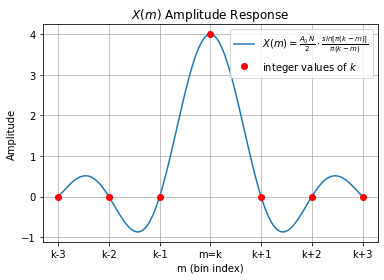

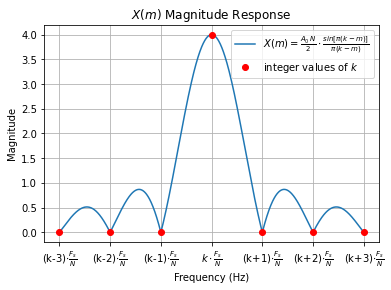

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft

# Define sinc function parameters
A0 = 1
N = 8
m = 0
k_min = -3
k_max = 3
k_real = np.linspace(k_min, k_max, 1000)
k_int = np.arange(k_min, k_max+1)

# Calculate sinc function for both real values of k and integer values of k
Xm_real = (A0 * N / 2) * np.sin(np.pi * (k_real - m)) / (np.pi * (k_real - m))
Xm_int = (A0 * N / 2) * np.sin(np.pi * (k_int - m)) / (np.pi * (k_int - m))
# Set the X(0) index manually since sin(0)/sin(0) is not defined
Xm_int[np.abs(k_int - m).argmin()] = (A0 * N / 2) 

# Plot amplitude response of the sinc function as a function of the bin index
fig, ax = plt.subplots()
ax.grid()
ax.plot(k_real, Xm_real, label=r'$X(m) = \frac{A_0 \, N}{2} \cdot \frac{sin\left[ \pi (k-m)\right]}{\pi (k-m)}$')
ax.plot(k_int, Xm_int, 'ro', label='integer values of $k$')
ax.set_title('$X(m)$ Amplitude Response')
ax.set_xticks(k_int)
xticklabels = []
xticklabels += ['k-{}'.format(abs(k_int)) for k_int in range(k_min, 0)]
xticklabels += ['m=k']
xticklabels += ['k+{}'.format(k_int) for k_int in range(1, k_max+1)]
ax.set_xticklabels(xticklabels)
ax.set_xlabel('m (bin index)')
ax.set_ylabel('Amplitude')
ax.legend()

# Plot magnitude response of the sinc function as a function of frequency
fig, ax = plt.subplots()
ax.grid()
ax.plot(k_real, np.abs(Xm_real), label=r'$X(m) = \frac{A_0 \, N}{2} \cdot \frac{sin\left[ \pi (k-m)\right]}{\pi (k-m)}$')
ax.plot(k_int, Xm_int, 'ro', label='integer values of $k$')
ax.set_title('$X(m)$ Magnitude Response')
ax.set_xticks(k_int)
xticklabels = []
xticklabels += ['(k-{0})'.format(abs(k_int)) + r'$\cdot \frac{F_s}{N}$' for k_int in range(k_min, 0)]
xticklabels += [r'$k \cdot \frac{F_s}{N}$']
xticklabels += ['(k+{0})'.format(k_int) + r'$\cdot \frac{F_s}{N}$' for k_int in range(1, k_max+1)]
ax.set_xticklabels(xticklabels)
ax.set_xlabel('Frequency (Hz)')
ax.set_ylabel('Magnitude')
ax.legend()
pass


## DTFT of a Truncated Sinusoid to Better Understand Leakage

As stated above, the sinc function is only an *approximation* for the DFT response. As the input frequenecy moves further away from bin center this approximation loses accuracy. To understand the true nature of leakage across all frequencies, we can calculate the discrete-time Fourier transform (DTFT) of a truncated sinusoid. The DTFT is the continuous Fourier transform of an *N*-point discrete time-domain sequence, defined as:

$$X(\omega) = \sum_{n=-\infty}^{\infty} x[n] \, e^{-j \omega n}$$

The formula for a truncated sinusoid is:

$$sin\left(\frac{2 \pi \, k \, n}{N}  + \theta \right) \cdot \left( u[n] - u[n-N] \right)$$

where $k$ is the number of sinusoidal cycles that occur over $N$ samples, and $u[n]$ is the unit step function where:

$$u[n] = \begin{cases}
      0 \; : \; n \lt 0 \\
      1 \; : \; n \ge 0 \\
      \end{cases}$$

An illustration of the truncated sinusoid is provided below.

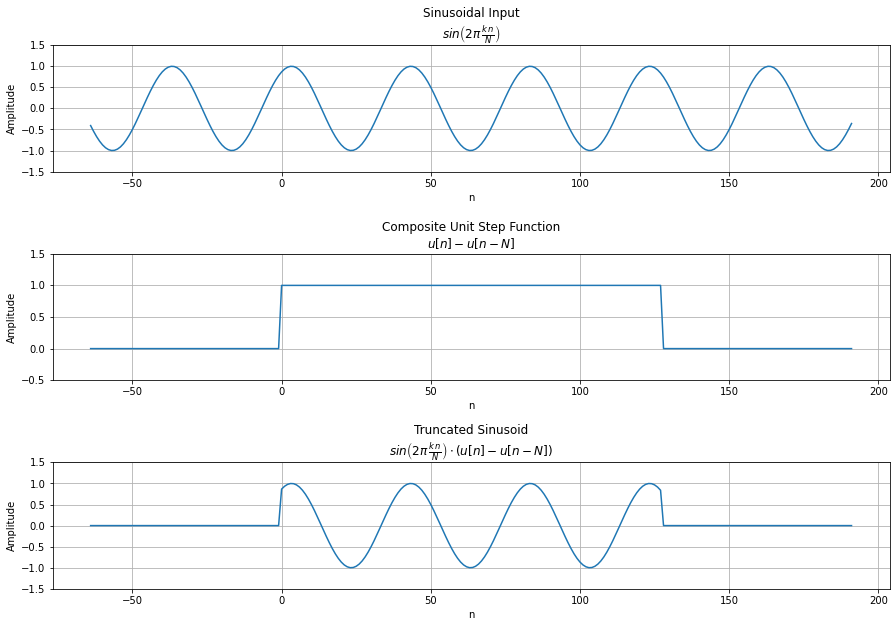

In [2]:
## Plot a truncated sinusoid

# Truncated sinusoid parameters
k = 3.2
N = 128
n = np.arange(-0.5*N, 1.5*N)
theta = np.pi/3

# Step function
def u(n): return np.heaviside(n, 1)

# Sinusoidal input
x_in = np.sin(2*np.pi*k*n/N + theta)

# Composite step function
u_comp = u(n) - u(n-N)

fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(15, 10))

# Plot sinusoidal input
ax[0].grid()
ax[0].plot(n, x_in)
ax[0].set_ylim((-1.5, 1.5))
ax[0].set_xlabel('n')
ax[0].set_ylabel('Amplitude')
ax[0].set_title('Sinusoidal Input\n' + r'$sin\left(2 \pi \, \frac{k \, n}{N} \right)$')

# Plot composite step function
ax[1].grid()
ax[1].plot(n, u_comp)
ax[1].set_ylim((-0.5, 1.5))
ax[1].set_xlabel('n')
ax[1].set_ylabel('Amplitude')
ax[1].set_title('Composite Unit Step Function\n$u[n] - u[n-N]$')

# Plot truncated sinusoid
ax[2].grid()
ax[2].plot(n, x_in * u_comp)
ax[2].set_ylim((-1.5, 1.5))
ax[2].set_xlabel('n')
ax[2].set_ylabel('Amplitude')
ax[2].set_title('Truncated Sinusoid\n' + r'$sin\left(2 \pi \, \frac{k \, n}{N} \right) \cdot \left( u[n] - u[n-N] \right)$')

plt.subplots_adjust(hspace=0.65)
pass

In order to calculate the DTFT of the truncated sinusoid, we can use a table of discrete-time Fourier transform pairs to find the following:

$$\begin{aligned}
  & \underline{\quad x[n] \quad } & \hspace{12em} & \underline{ \quad X(\omega) \quad } \\
  & \hspace{-1.9em} A_0 \, sin(\omega_0 n \, + \, \theta) & & \hspace{-6.5em} A_0 \, \frac{\pi}{j} \left[e^{j \theta} \delta (\omega - \omega_0) - e^{-j \theta} \delta (\omega + \omega_0) \right] , \quad -\pi \lt \omega \lt \pi \\
  & \hspace{-1.5em} u[n] \, - \, u[n - N] & & \hspace{-2.5em} e^{-j \omega \frac{N-1}{2}} \cdot \frac{sin\left( \frac{\omega}{2} N\right)}{sin\left( \frac{\omega}{2}\right)} \\
\end{aligned}$$

Looking at the table of discrete-time Fourier transform properties we see that:

$$\begin{aligned}
  & \underline{\quad \text{Property} \quad} & \hspace{3em} & \underline{\quad \text{Time Domain} \quad} & \hspace{3em} & \underline{\quad \text{DTFT Domain} \quad} \\
  & \text{Multiplication} & & \hspace{2.15em} a[n] \, b[n] & & \hspace{-1.5em} \frac{1}{2 \pi} \int_{-\pi}^{\pi} A(\phi) \, B(\omega - \phi) \, d \phi\\
\end{aligned}$$

Using the multiplication property of the DTFT with the truncated sinusoid we get:

$$A_0 \, sin \left(\omega_0 n \, + \, \theta \right) \cdot \left(u[n] \, - \, u[n-N] \right)$$

$$\Bigg\Downarrow \, \text{DTFT}$$

$$X(\omega) = \, \frac{1}{2 \pi} \int_{-\pi}^{\pi} A(\phi) \, B(\omega - \phi) \, d \phi$$

$$= \frac{1}{2 \pi} \int_{-\pi}^{\pi} \, \left[ A_0 \, \frac{\pi}{j} \left[e^{j \theta} \delta (\phi - \omega_0) - e^{-j \theta}\delta (\phi + \omega_0) \right] \cdot e^{-j (\omega - \phi) \frac{N-1}{2}} \cdot \frac{sin\left( \frac{(\omega - \phi)}{2} N\right)}{sin\left( \frac{(\omega - \phi)}{2}\right)} \right] \hspace{0.5em} d\phi$$

$$= \frac{A_0}{2 j} \left[ e^{-j \left[ (\omega - \omega_0) \frac{N-1}{2} - \theta \right]} \cdot \frac{sin\left( \frac{(\omega - \omega_0)}{2} N\right)}{sin\left( \frac{(\omega - \omega_0)}{2}\right)} \, - \, e^{-j \left[ (\omega + \omega_0) \frac{N-1}{2} + \theta \right] } \cdot \frac{sin\left( \frac{(\omega + \omega_0)}{2} N\right)}{sin\left( \frac{(\omega + \omega_0)}{2}\right)} \right]$$

Now we can let $\omega = m \frac{2 \pi}{N}$, where $m$ is the DFT bin index that we are interested in measuring the leakage at and we can let $\omega_0 = k \frac{2 \pi}{N}$, where $k$ is a real number representing the distance in bins that the input sinusoid is from $m$. Substituting these values into $X(\omega)$ and simplifying a bit we get:

$$X(m) = \frac{A_0}{2 j} \left[ e^{-j \left[ (\pi (m - k) \frac{N-1}{N})  - \theta \right]} \cdot \frac{sin\left(\pi (k - m)\right)}{sin\left( \frac{1}{N} \pi (k - m) \right)} \, - \, e^{-j \left[ (\pi (m + k) \frac{N-1}{N})  + \theta \right] } \cdot \frac{sin\left(\pi (k + m)\right)}{sin\left( \frac{1}{N} \pi (k + m) \right)} \right]$$

This equation $X(m)$ can be used to calculate the leakage for any sinusoidal input in bin $m$ of the DFT output. For a typical sinusoidal input, $k$ is related to the input frequency $f$ by the following equation:

$$k = f \frac{N}{F_s}$$

The example below calculates an *N*-point fast Fourier tansform (FFT), which is just an efficient implementation of the DFT, on a sinusoidal input with arbitrary phase and frequency. These DFT outputs are then superimposed on top of the DTFT of the input, $X(m)$, to illustrate how the signal energy gets spread out across multiple DFT bins. 

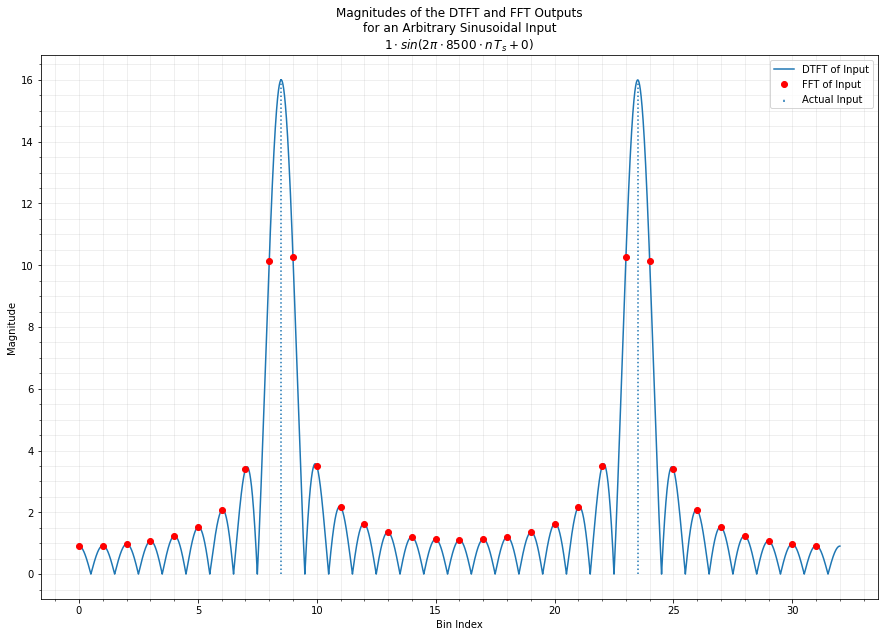

In [3]:
# Sample rate and sample period
Fs = 32e3
Ts = 1/Fs

# Number of DFT bins
N = 32

# Input parameters
A0 = 1
f = 8500
theta = 0
n = np.arange(0, N)

# Sinusoidal input data
x_in = A0 * np.sin(2 * np.pi * f * n * Ts + theta)

# Calculate the FFT (just an efficient form of the DFT)
x_fft = fft(x_in)

# Calculate the bin that the input frequency falls in
# Note that this will be real number that lies between two bins
# so long as N/Fs is not a multiple of f
k = f * N/Fs

# Range of bins to calculate X(m) over
# The step size is set sufficiently low to provide high resolution
# between the DFT bins
m = np.arange(0, N, 1e-4)

# Calculate the DTFT for the configured sinusoidal input
Xm = \
    A0/2j * (
        np.exp(-1j*(np.pi*(m-k)*(N-1)/N - theta)) *
        np.sin(np.pi*(k-m)) / np.sin(np.pi*(k-m)/N)
        - np.exp(-1j*(np.pi*(m+k)*(N-1)/N + theta)) *
        np.sin(np.pi*(k+m)) / np.sin(np.pi*(k+m)/N)
    )

# Plot the FFT and the DTFT of the sinusoidal input
fig, ax = plt.subplots(figsize=(15, 10))
ax.minorticks_on()
ax.grid(True, which='both', alpha=0.25)
ax.plot(m, np.abs(Xm), label='DTFT of Input')
ax.plot(n, np.abs(x_fft), 'ro', label='FFT of Input')
ax.stem([k, N-k], [A0*N/2, A0*N/2], basefmt=' ', linefmt=':', markerfmt=' ', label='Actual Input')
ax.set_xlabel('Bin Index')
ax.set_ylabel('Magnitude')
ax.set_title('Magnitudes of the DTFT and FFT Outputs\nfor an Arbitrary Sinusoidal Input\n' +
             '${} \cdot sin(2 \pi \cdot {} \cdot n \, T_s + {})$'.format(A0, f, theta))
ax.legend()
pass

## Leakage and the Cyclic Nature of the DFT

It is important to remember that the DFT is periodic about $2 \pi$, which means that leakage effects can bleed over across the $0 \pi .. 2 \pi$ boundary. It can be useful to visualize the DFT as a circular plot in 3 dimensions to better understand the cyclic nature of the DFT. Below is an example of a 3D plot of the DFT and DTFT for an arbitrary sinusoid of low frequency with respect to the sample rate. This illustrates how the spectral content can bleed across the $0 \pi .. 2 \pi$ boundary.

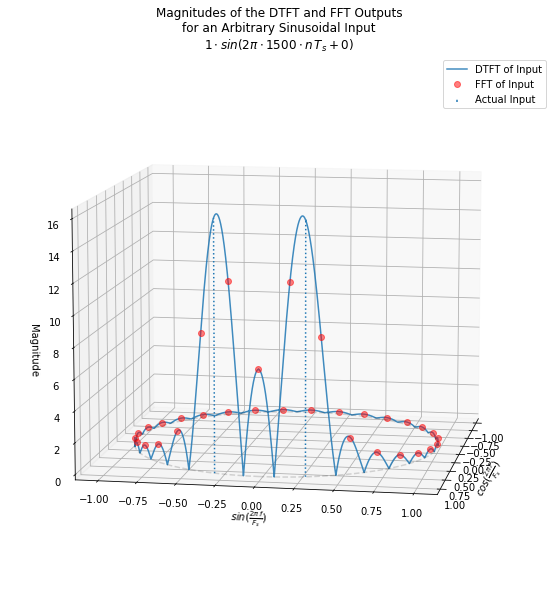

In [4]:
# Sample rate and sample period
Fs = 32e3
Ts = 1/Fs

# Number of DFT bins
N = 32

# Input parameters
A0 = 1
f = 1500
theta = 0
n = np.arange(0, N)

# Sinusoidal input data
x_in = A0 * np.sin(2 * np.pi * f * n * Ts + theta)

# Calculate the FFT (just an efficient form of the DFT)
x_fft = fft(x_in)

# Calculate the bin that the input frequency falls in
# Note that this will be real number that lies between two bins
# so long as N/Fs is not a multiple of f
k = f * N/Fs

# Range of bins to calculate X(m) over
# The step size is set sufficiently low to provide high resolution
# between the DFT bins
m = np.arange(0, N, 1e-4)

# Calculate the DTFT for the configured sinusoidal input
Xm = \
    A0/2j * (
        np.exp(-1j*(np.pi*(m-k)*(N-1)/N - theta)) *
        np.sin(np.pi*(k-m)) / np.sin(np.pi*(k-m)/N)
        - np.exp(-1j*(np.pi*(m+k)*(N-1)/N + theta)) *
        np.sin(np.pi*(k+m)) / np.sin(np.pi*(k+m)/N)
    )

# Calculate 3D mappings for frequency axis
theta_n = np.arange(0, 2 * np.pi, 2*np.pi/len(n))
x_n = np.cos(theta_n)
y_n = np.sin(theta_n)
theta_m = np.arange(0, 2 * np.pi, 2*np.pi/len(m))
x_m = np.cos(theta_m)
y_m = np.sin(theta_m)
theta_actual = [2*np.pi*f/Fs, 2*np.pi*(Fs - f)/Fs]
x_actual = np.cos(theta_actual)
y_actual = np.sin(theta_actual)

# Plot the FFT and the DTFT of the sinusoidal input
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111, projection='3d')
ax.grid()
ax.plot(x_m, y_m, np.abs(Xm), label='DTFT of Input', alpha = 0.85)
ax.plot(x_n, y_n, np.abs(x_fft), 'ro', label='FFT of Input', alpha = 0.5)
ax.stem(x_actual, y_actual, [A0*N/2, A0*N/2], basefmt=' ', linefmt=':', markerfmt=' ', label='Actual Input')
ax.plot(x_m, y_m, np.zeros_like(x_m), 'k--', alpha=0.15)
ax.set_xlabel(r'$cos(\frac{{2 \pi \, f}}{{F_s}})$')
ax.set_ylabel(r'$sin(\frac{2 \pi \, f}{F_s})$')
ax.set_zlabel('Magnitude')
ax.set_title('Magnitudes of the DTFT and FFT Outputs\nfor an Arbitrary Sinusoidal Input\n' +
             '${} \cdot sin(2 \pi \cdot {} \cdot n \, T_s + {})$'.format(A0, f, theta))
ax.legend()
ax.view_init(10, 10)
pass